In [ ]:
pip install scikit-plot

In [ ]:
# - Pandas
import pandas as pd
# - numpy
import numpy as np
# - seaborn
import seaborn as sb
# - scikitplot
import scikitplot as skplt
# - sklearn
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
# - imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import warnings

sb.set_style("dark")
warnings.filterwarnings('ignore')

In [ ]:
database = pd.read_csv('credit_card_defaulter.csv')
database.head()

,indice,defaulter,student,balance,income
0,1,0,0,729.526495,44361.62507
1,2,0,1,817.180407,12106.13470
2,3,0,0,1073.549164,31767.13895
3,4,0,0,529.250605,35704.49394
4,5,0,0,785.655883,38463.49588


<h1>Treinamento</h1>

In [ ]:
# separar variáveis entre X e y
X = database.drop('defaulter', axis=1)
y = database['defaulter']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

<h2>Sem Rebalanceamento</h2>


    Inadimplentes : 9667
    Adimplente : 333 (3.33%)
    


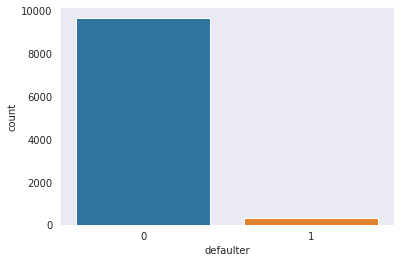

In [ ]:
neg, pos = np.bincount(database['defaulter'])


print(
    '''
    Inadimplentes : {}
    Adimplente : {} ({:.2f}%)
    '''.format(neg, pos, 100*pos/total)
)
sb.countplot('defaulter', data = database);

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9679    0.9975    0.9825      2418
           1     0.2500    0.0244    0.0444        82

    accuracy                         0.9656      2500
   macro avg     0.6089    0.5110    0.5135      2500
weighted avg     0.9444    0.9656    0.9517      2500

Acurácia: 0.9656

AUC: 0.5110



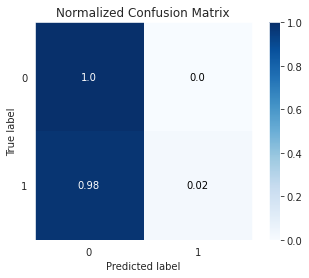

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

<h2>Rebalanceamento</h2>

<h3>UnderSample</h3>

1    251
0    251
dtype: int64


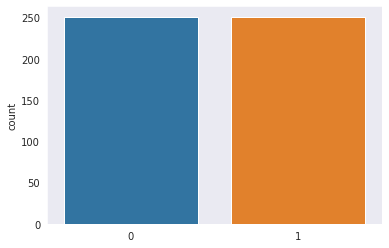

In [ ]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())

# plotar a nova distribuição de classes
sb.countplot(y_res)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9785    0.9599    0.9691      2418
           1     0.2422    0.3780    0.2952        82

    accuracy                         0.9408      2500
   macro avg     0.6103    0.6690    0.6322      2500
weighted avg     0.9543    0.9408    0.9470      2500

Acurácia: 0.9408

AUC: 0.6690



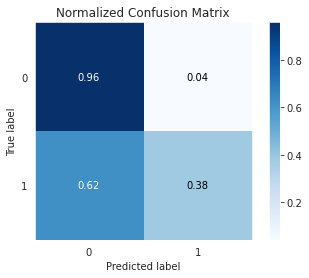

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
model_res = LogisticRegression()
model_res.fit(X_res, y_res)

# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(X_test)
y_proba_res = model_res.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_res, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_res)))

<h3>OverSample</h3>

1    7249
0    7249
dtype: int64


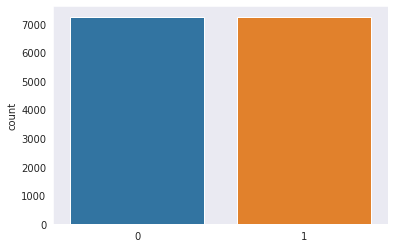

In [ ]:
# usar técnica under-sampling
ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X_train, y_train)
# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())

# plotar a nova distribuição de classes
sb.countplot(y_res)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9942    0.8515    0.9174      2418
           1     0.1632    0.8537    0.2740        82

    accuracy                         0.8516      2500
   macro avg     0.5787    0.8526    0.5957      2500
weighted avg     0.9669    0.8516    0.8963      2500

Acurácia: 0.8516

AUC: 0.8526



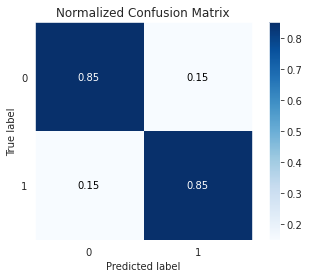

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
model_res = LogisticRegression()
model_res.fit(X_res, y_res)

# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(X_test)
y_proba_res = model_res.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_res, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_res)))